In [5]:
import pandas as pd
import plotly.express as px
from helper import get_conn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import seaborn as sns
import warnings
import numpy as np

# Suppress warnings
warnings.filterwarnings("ignore")

# Function to execute a query and return a DataFrame
def execute_query(query):
    # Connect to the PostgreSQL database
    conn, cursor = get_conn()

    cursor.execute(query)
    columns = [desc[0] for desc in cursor.description]
    data = cursor.fetchall()

    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)


# Query to retrieve data from the views
views_queries = [
    "SELECT * FROM data_mart.total_sales_by_category_quarter;",
    "SELECT * FROM data_mart.monthly_sales_trend;",
    "SELECT * FROM data_mart.top_selling_products;",
    "SELECT * FROM data_mart.sales_distribution_by_state;",
    "SELECT * FROM data_mart.sales_performance_by_brand;",
    "SELECT * FROM data_mart.monthly_sales_by_category_brand;",
]

# View 1

In [6]:
df = execute_query(views_queries[0])
# Convert 'total_sales' to numeric if needed
df['total_sales'] = pd.to_numeric(df['total_sales'], errors='coerce')

# Create a side-by-side bar chart with Plotly
fig = px.bar(
    df, 
    x='quarter', 
    y='total_sales', 
    color='category_name', 
    barmode='group',
    labels={'total_sales': 'Total Sales'},
    title='Total Sales by Category and Quarter'
)

# Customizing layout
fig.update_layout(
    xaxis_title='Quarter',
    yaxis_title='Total Sales',
    legend_title='Category',
    barmode='group',
    showlegend=True
)

# Show the interactive plot
fig.show()

Connected to the database


# View 2

Connected to the database


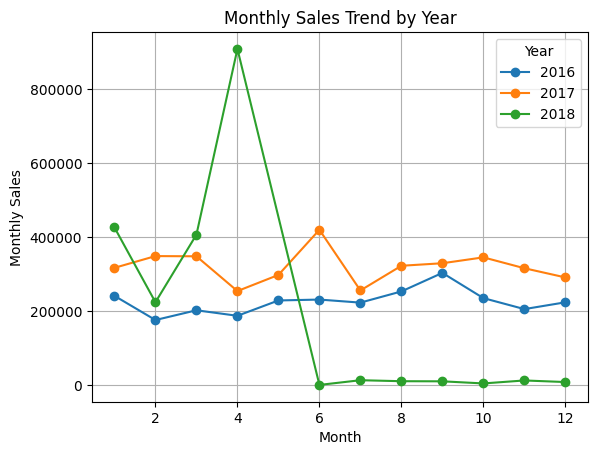

In [7]:
df = execute_query(views_queries[1])
# Create a line chart
fig, ax = plt.subplots()
for year, group in df.groupby('year'):
    ax.plot(group['month'], group['monthly_sales'], marker='o', label=str(year))

# Customize the plot
ax.set(xlabel='Month', ylabel='Monthly Sales', title='Monthly Sales Trend by Year')
ax.legend(title='Year')
plt.grid(True)
plt.show()

# View 3

Connected to the database


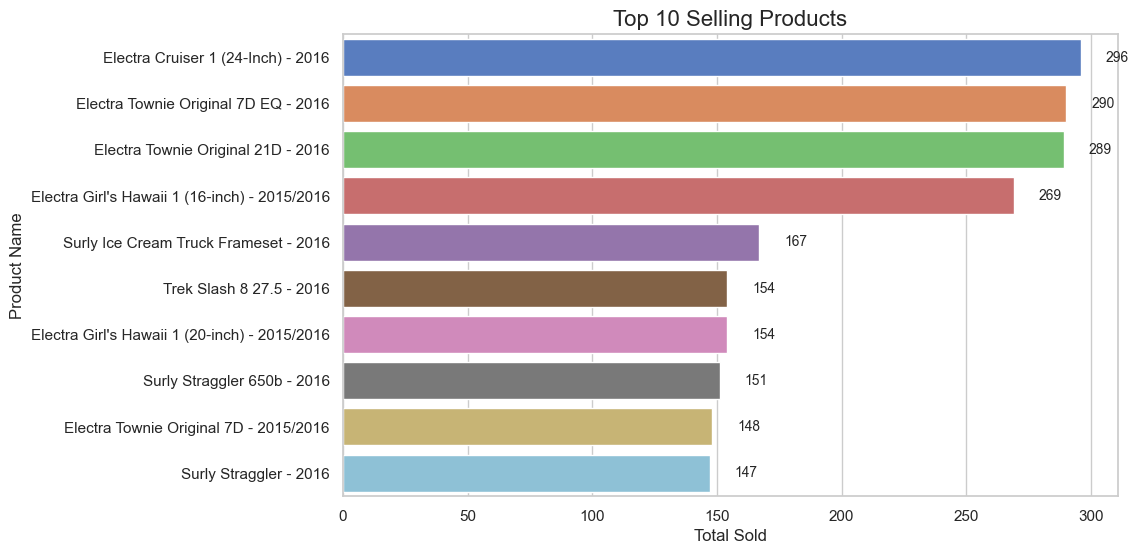

In [8]:
df = execute_query(views_queries[2])
# Sort DataFrame by total_sold in descending order
df = df.sort_values(by="total_sold", ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a horizontal bar chart with Seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="total_sold", y="product_name", data=df, palette="muted")

# Add data labels
for p in bar_plot.patches:
    width = p.get_width()
    plt.text(
        width + 10,
        p.get_y() + p.get_height() / 2,
        f"{width:.0f}",
        va="center",
        fontsize=10,
    )

# Customizing layout
plt.title("Top 10 Selling Products", fontsize=16)
plt.xlabel("Total Sold", fontsize=12)
plt.ylabel("Product Name", fontsize=12)

# Show the plot
plt.show()

# View 4

Connected to the database


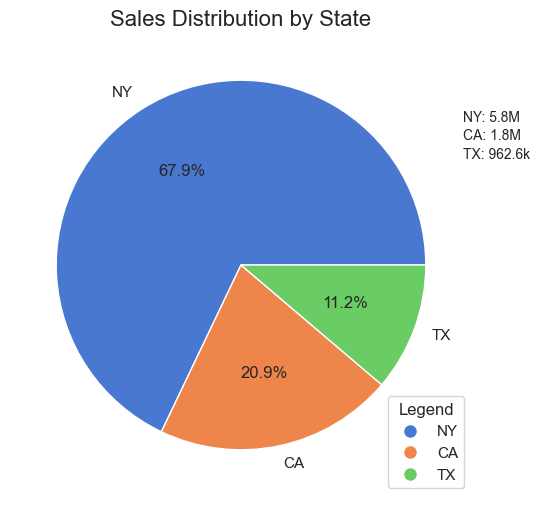

In [10]:
df = execute_query(views_queries[3])
import matplotlib.pyplot as plt
import seaborn as sns

# Sort DataFrame by total_sales in descending order
df = df.sort_values(by="total_sales", ascending=False)

# Function to format sales labels
def format_sales_label(sales):
    sales_float = float(sales)
    if sales_float >= 1e6:
        return f"{sales_float/1e6:.1f}M"
    elif sales_float >= 1e3:
        return f"{sales_float/1e3:.1f}k"
    else:
        return f"{sales_float:.0f}"

# Apply the formatting function to the total_sales column
df["formatted_sales"] = df["total_sales"].apply(format_sales_label)

# Set custom color palette
colors = sns.color_palette("muted", len(df))

# Create a pie chart with Matplotlib using the custom color palette
plt.figure(figsize=(10, 6))
pie_plot = plt.pie(df["total_sales"], labels=df["store_state"], autopct='%1.1f%%', colors=colors)

# Add data labels
for i, (label, formatted_sales) in enumerate(zip(df["store_state"], df["formatted_sales"])):
    plt.text(1.2, 0.8 - 0.1*i, f"{label}: {formatted_sales}", fontsize=10, verticalalignment="center")

# Customizing layout
plt.title("Sales Distribution by State", fontsize=16)

# Manually create legend with correct colors
legend_labels = df["store_state"]
legend_handles = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=color, markersize=10)
    for color in colors
]
plt.legend(legend_handles, legend_labels, title="Legend", loc="lower right")

# Show the plot
plt.show()


# View 5

Connected to the database


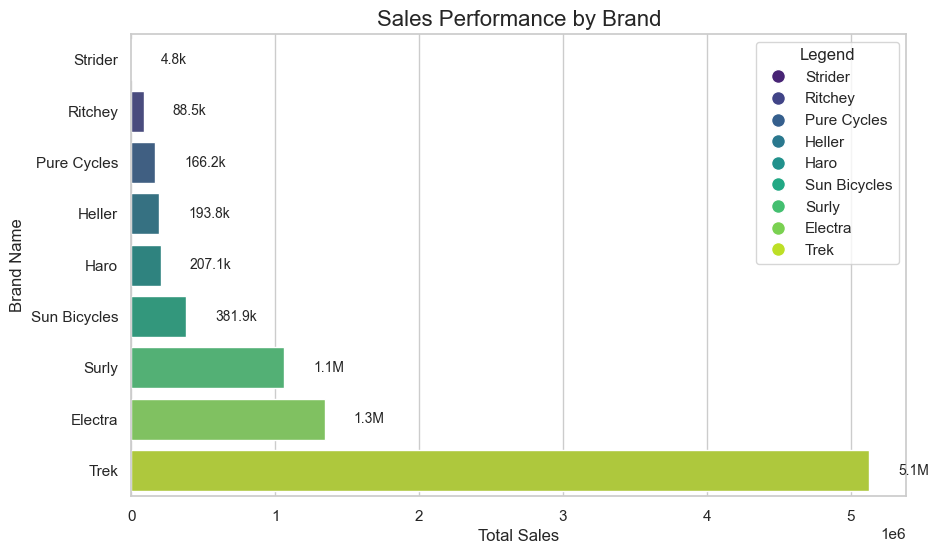

In [11]:
df = execute_query(views_queries[4])
# Sort DataFrame by total_sales in descending order
df = df.sort_values(by="total_sales", ascending=True)


# Function to format sales labels
def format_sales_label(sales):
    sales_float = float(sales)
    if sales_float >= 1e6:
        return f"{sales_float/1e6:.1f}M"
    elif sales_float >= 1e3:
        return f"{sales_float/1e3:.1f}k"
    else:
        return f"{sales_float:.0f}"


# Apply the formatting function to the total_sales column
df["formatted_sales"] = df["total_sales"].apply(format_sales_label)

# Set custom color palette
colors = sns.color_palette("viridis", len(df))

# Create a bar chart with Seaborn using the custom color palette
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="total_sales", y="brand_name", data=df, palette=colors)

# Add data labels
for p, label in zip(bar_plot.patches, df["formatted_sales"]):
    width = p.get_width()
    plt.text(
        width + 200000, p.get_y() + p.get_height() / 2, label, va="center", fontsize=10
    )

# Customizing layout
plt.title("Sales Performance by Brand", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Brand Name", fontsize=12)

# Add legend to the top right
legend_labels = df["brand_name"]
legend_handles = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=color, markersize=10)
    for color in colors
]
plt.legend(legend_handles, legend_labels, title="Legend", loc="upper right")

# Show the plot
plt.show()

# View 6

In [13]:
df = execute_query(views_queries[5])
# Create a sunburst chart
fig = px.sunburst(df, path=['year', 'month', 'category_name', 'brand_name'],
                  values='monthly_sales', title='Monthly Sales by Category and Brand (Sunburst)',
                  height=800, width=800)

# Customize the layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
    font=dict(family="Arial", size=12, color="RebeccaPurple"),
    paper_bgcolor='rgba(0,0,0,0)',  # Make the background transparent
)

# Style the sunburst chart
fig.update_traces(
    marker=dict(
        line=dict(
            color='black',  # Border color
            width=0.5  # Border width
        )
    )
)



Connected to the database


In [14]:
fig.write_html("monthly_sales_sunburst.html")